<a href="https://colab.research.google.com/github/christybiji/MIT-IDSS-Recommendation-System/blob/main/Recommendation_Systems_Learner_Notebook_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project: Amazon Product Recommendation System**

# **Marks: 40**


Welcome to the project on Recommendation Systems. We will work with the Amazon product reviews dataset for this project. The dataset contains ratings of different electronic products. It does not include information about the products or reviews to avoid bias while building the model.

--------------
## **Context:**
--------------

Today, information is growing exponentially with volume, velocity and variety throughout the globe. This has lead to information overload, and too many choices for the consumer of any business. It represents a real dilemma for these consumers and they often turn to denial. Recommender Systems are one of the best tools that help recommending products to consumers while they are browsing online. Providing personalized recommendations which is most relevant for the user is what's most likely to keep them engaged and help business.

E-commerce websites like Amazon, Walmart, Target and Etsy use different recommendation models to provide personalized suggestions to different users. These companies spend millions of dollars to come up with algorithmic techniques that can provide personalized recommendations to their users.

Amazon, for example, is well-known for its accurate selection of recommendations in its online site. Amazon's recommendation system is capable of intelligently analyzing and predicting customers' shopping preferences in order to offer them a list of recommended products. Amazon's recommendation algorithm is therefore a key element in using AI to improve the personalization of its website. For example, one of the baseline recommendation models that Amazon uses is item-to-item collaborative filtering, which scales to massive data sets and produces high-quality recommendations in real-time.

----------------
## **Objective:**
----------------

You are a Data Science Manager at Amazon, and have been given the task of building a recommendation system to recommend products to customers based on their previous ratings for other products. You have a collection of labeled data of Amazon reviews of products. The goal is to extract meaningful insights from the data and build a recommendation system that helps in recommending products to online consumers.

-----------------------------
## **Dataset:**
-----------------------------

The Amazon dataset contains the following attributes:

- **userId:** Every user identified with a unique id
- **productId:** Every product identified with a unique id
- **Rating:** The rating of the corresponding product by the corresponding user
- **timestamp:** Time of the rating. We **will not use this column** to solve the current problem

**Note:** The code has some user defined functions that will be usefull while making recommendations and measure model performance, you can use these functions or can create your own functions.

Sometimes, the installation of the surprise library, which is used to build recommendation systems, faces issues in Jupyter. To avoid any issues, it is advised to use **Google Colab** for this project.

Let's start by mounting the Google drive on Colab.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Installing surprise library**

In [ ]:
#Uninstall associated libraries that gives compatability issues with suprise
!pip uninstall -y numpy

# Install the surprise library
!pip install numpy==1.26.4
!pip install scikit-surprise

#Crucial: Restart Runtime
import os
os.kill(os.getpid(), 9)


Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 110.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 5.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2463214 sha256=46e0319f408c60e6f7fcd099ad9aaf685bb3db795497c433729577140dfb3561
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85

In [ ]:
#Numpy version verification
import numpy as np
print(np.__version__)

1.26.4


In [ ]:
#importing the suprise library
from surprise import SVD
from surprise import Dataset

## **Importing the necessary libraries and overview of the dataset**

In [ ]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np, pandas as pd

# Basic library for data visualization
import matplotlib.pyplot as plt

# Slightly advanced library for data visualization
import seaborn as sns

# A dictionary output that does not raise a key error
from collections import defaultdict

# A performance metrics in sklearn
from sklearn.metrics import mean_squared_error

### **Loading the data**
- Import the Dataset
- Add column names ['user_id', 'prod_id', 'rating', 'timestamp']
- Drop the column timestamp
- Copy the data to another DataFrame called **df**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/MIT IDSS : Data Science and Machine Learning /Projectt 3/ratings_Electronics.csv')
#data = pd.read_csv('/content/drive/MyDrive/ratings_Electronics.csv')

#copying the data to df
df = data.copy()
df.head()

,AKM1MP6P0OYPR,0132793040,5.0,1365811200
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [ ]:
#Adding column names to the df dataframe.
df.columns = ['user_id', 'prod_id', 'rating', 'timestamp']
df.head()

,user_id,prod_id,rating,timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [ ]:
#Dropping the timestap column
df.drop(columns=['timestamp'], inplace=True)
df.head()

,user_id,prod_id,rating
0,A2CX7LUOHB2NDG,0321732944,5.0
1,A2NWSAGRHCP8N5,0439886341,1.0
2,A2WNBOD3WNDNKT,0439886341,3.0
3,A1GI0U4ZRJA8WN,0439886341,1.0
4,A1QGNMC6O1VW39,0511189877,5.0


In [ ]:
df.tail()

,user_id,prod_id,rating
7824476,A2YZI3C9MOHC0L,BT008UKTMW,5.0
7824477,A322MDK0M89RHN,BT008UKTMW,5.0
7824478,A1MH90R0ADMIK0,BT008UKTMW,4.0
7824479,A10M2KEFPEQDHN,BT008UKTMW,4.0
7824480,A2G81TMIOIDEQQ,BT008V9J9U,5.0


In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,7824481,4201696,A5JLAU2ARJ0BO,520,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prod_id,7824481,476001,B0074BW614,18244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,7824481.0,NaN,NaN,NaN,4.012337,1.38091,1.0,3.0,5.0,5.0,5.0


In [ ]:
df.shape

(7824481, 3)

**As this dataset is very large and has 7,824,482 observations, it is not computationally possible to build a model using this. Moreover, many users have only rated a few products and also some products are rated by very few users. Hence, we can reduce the dataset by considering certain logical assumptions.**

Here, we will be taking users who have given at least 50 ratings, and the products that have at least 5 ratings, as when we shop online we prefer to have some number of ratings of a product.

In [ ]:
# Get the column containing the users
users = df.user_id

# Create a dictionary from users to their number of ratings
ratings_count = dict()

for user in users:

    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1

    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1


In [ ]:
# We want our users to have at least 50 ratings to be considered
RATINGS_CUTOFF = 50

remove_users = []

for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

print("\nFirst few rows of the filtered DataFrame:\n",df.head())
print("Shape of the filtered DataFrame (users with at least 50 ratings):", df.shape)


First few rows of the filtered DataFrame:
             user_id     prod_id  rating
93   A3BY5KCNQZXV5U  0594451647     5.0
117   AT09WGFUM934H  0594481813     3.0
176  A32HSNCNPRUMTR  0970407998     1.0
177  A17HMM1M7T9PJ1  0970407998     4.0
491  A3CLWR1UUZT6TG  0972683275     5.0
Shape of the filtered DataFrame (users with at least 50 ratings): (125871, 3)


In [ ]:
# Get the column containing the products
prods = df.prod_id

# Create a dictionary from products to their number of ratings
ratings_count = dict()

for prod in prods:

    # If we already have the product, just add 1 to its rating count
    if prod in ratings_count:
        ratings_count[prod] += 1

    # Otherwise, set their rating count to 1
    else:
        ratings_count[prod] = 1


In [ ]:
# We want our item to have at least 5 ratings to be considered
RATINGS_CUTOFF = 5

remove_users = []

for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

df_filtered = df.loc[~ df.prod_id.isin(remove_users)]

print("\nFirst few rows of the filtered DataFrame:\n",df_filtered.head())
print("Shape of the filtered DataFrame (products with at least 5 ratings):", df_filtered.shape)


First few rows of the filtered DataFrame:
              user_id     prod_id  rating
1309  A3LDPF5FMB782Z  1400501466     5.0
1321  A1A5KUIIIHFF4U  1400501466     1.0
1334  A2XIOXRRYX0KZY  1400501466     3.0
1450   AW3LX47IHPFRL  1400501466     5.0
1455  A1E3OB6QMBKRYZ  1400501466     1.0
Shape of the filtered DataFrame (products with at least 5 ratings): (65290, 3)


In [ ]:
# Print a few rows of the imported dataset
df_filtered.head()

,user_id,prod_id,rating
1309,A3LDPF5FMB782Z,1400501466,5.0
1321,A1A5KUIIIHFF4U,1400501466,1.0
1334,A2XIOXRRYX0KZY,1400501466,3.0
1450,AW3LX47IHPFRL,1400501466,5.0
1455,A1E3OB6QMBKRYZ,1400501466,1.0


## **Exploratory Data Analysis**

### **Shape of the data**

### **Check the number of rows and columns and provide observations.**

In [ ]:
# Check the number of rows and columns and provide observations
df_filtered.shape

(65290, 3)

**Write your observations here:**

> After filtering the data, the shape of the dataframe has reduced to 65290 rows and 3 columns.



### **Data types**

In [ ]:
# Check Data types and provide observations
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65290 entries, 1309 to 7824426
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  65290 non-null  object 
 1   prod_id  65290 non-null  object 
 2   rating   65290 non-null  float64
dtypes: float64(1), object(2)
memory usage: 2.0+ MB


**Write your observations here:**
- columns: **'user_id', 'prod_id'** is data type *object*.
- **'rating'** is type *integer*.



### **Checking for missing values**

In [ ]:
# Check for missing values present and provide observations
df_filtered.isnull().sum()/df_filtered.shape[0]*100

,0
user_id,0.0
prod_id,0.0
rating,0.0


**Write your observations here:**
- No, missing value is observed in the filtered dataframe.

### **Summary Statistics**

In [ ]:
# Get summary statistics using .describe()
summary_stats = df_filtered['rating'].describe()
print("Summary Statistics of 'rating':\n", summary_stats)

print("\nObservations:")

# Observations based on the summary statistics
if 'count' in summary_stats and not pd.isna(summary_stats['count']):
    print(f"There are {int(summary_stats['count'])} non-missing ratings in the dataset.")
else:
    print("The count of non-missing ratings could not be determined.")

if 'mean' in summary_stats and not pd.isna(summary_stats['mean']):
    print(f"The average rating is {summary_stats['mean']:.2f}.")
else:
    print("The mean rating could not be determined.")

if 'std' in summary_stats and not pd.isna(summary_stats['std']):
    print(f"The standard deviation of the ratings is {summary_stats['std']:.2f}, indicating the spread of the ratings.")
else:
    print("The standard deviation of the ratings could not be determined.")

if 'min' in summary_stats and not pd.isna(summary_stats['min']):
    print(f"The lowest rating given is {int(summary_stats['min'])}.")
else:
    print("The minimum rating could not be determined.")

if 'max' in summary_stats and not pd.isna(summary_stats['max']):
    print(f"The highest rating given is {int(summary_stats['max'])}.")
else:
    print("The maximum rating could not be determined.")

if '50%' in summary_stats and not pd.isna(summary_stats['50%']):
    print(f"The median rating (50th percentile) is {summary_stats['50%']:.2f}, which is the middle value of the ratings.")
else:
    print("The median rating could not be determined.")

if '25%' in summary_stats and not pd.isna(summary_stats['25%']):
    print(f"25% of the ratings are below {summary_stats['25%']:.2f}.")
else:
    print("The 25th percentile could not be determined.")

if '75%' in summary_stats and not pd.isna(summary_stats['75%']):
    print(f"75% of the ratings are below {summary_stats['75%']:.2f}.")
else:
    print("The 75th percentile could not be determined.")

# Check for potential skewness (rough estimate)
if 'mean' in summary_stats and '50%' in summary_stats and not pd.isna(summary_stats['mean']) and not pd.isna(summary_stats['50%']):
    mean_rating = summary_stats['mean']
    median_rating = summary_stats['50%']
    if mean_rating > median_rating:
        print("The distribution might be slightly right-skewed (mean > median).")
    elif mean_rating < median_rating:
        print("The distribution might be slightly left-skewed (mean < median).")
    else:
        print("The distribution appears to be roughly symmetric (mean = median).")
else:
    print("Skewness observation could not be made due to missing mean or median.")



Summary Statistics of 'rating':
 count    65290.000000
mean         4.294808
std          0.988915
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

Observations:
There are 65290 non-missing ratings in the dataset.
The average rating is 4.29.
The standard deviation of the ratings is 0.99, indicating the spread of the ratings.
The lowest rating given is 1.
The highest rating given is 5.
The median rating (50th percentile) is 5.00, which is the middle value of the ratings.
25% of the ratings are below 4.00.
75% of the ratings are below 5.00.
The distribution might be slightly left-skewed (mean < median).


### **Checking the rating distribution**

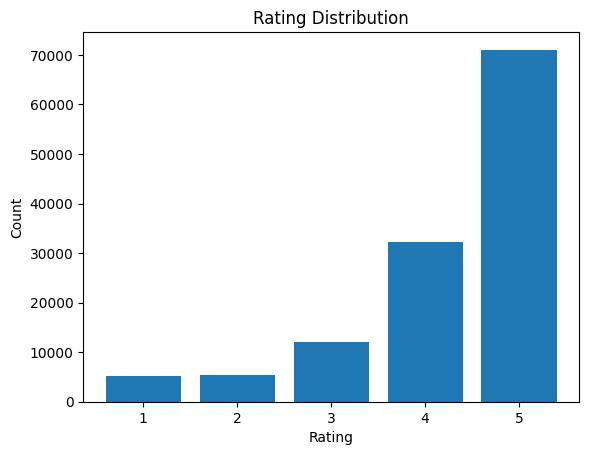

In [ ]:
# Create the bar plot and provide observations
user_id_counts = df['rating'].value_counts()
plt.bar(user_id_counts.index, user_id_counts.values)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution')
plt.show()

**Observations:**

* The data seems to be **highly skewed** towards Rating **'4' and '5'**. Rating **'5'** is the highest in the count followed by the number of 4 rating count.

* We can see very few people are giving ratings **between 1 to 3**. It shows people tend to **not give a rating** for a product that they **don't like**.

### **Checking the number of unique users and items in the dataset**

In [ ]:
# Number of total rows in the data and number of unique user id and product id in the data
print("Total rows of the filtered DataFrame:",df_filtered.shape[0])
print("Numer of unique user id in filtered DataFrame:",df_filtered['user_id'].nunique())
print("Numer of unique product id in filtered DataFrame:",df_filtered['prod_id'].nunique())

Total rows of the filtered DataFrame: 65290
Numer of unique user id in filtered DataFrame: 1540
Numer of unique product id in filtered DataFrame: 5689


**Write your observations here:**
- Total rows of the filtered DataFrame: 65290
- Numer of unique user id in filtered DataFrame: 1540
- Numer of unique product id in filtered DataFrame: 5689

### **Users with the most number of ratings**

In [ ]:
# Top 10 users based on the number of ratings
top_10_users = df_filtered['user_id'].value_counts().head(100)
top_10_users

,count
user_id,
ADLVFFE4VBT8,295
A3OXHLG6DIBRW8,230
A1ODOGXEYECQQ8,217
A36K2N527TXXJN,212
A25C2M3QF9G7OQ,203
...,...
A1ZCSSCAGBCD49,94
A250AXLRBVYKB4,94
A2QRXQPHDMFCQV,94


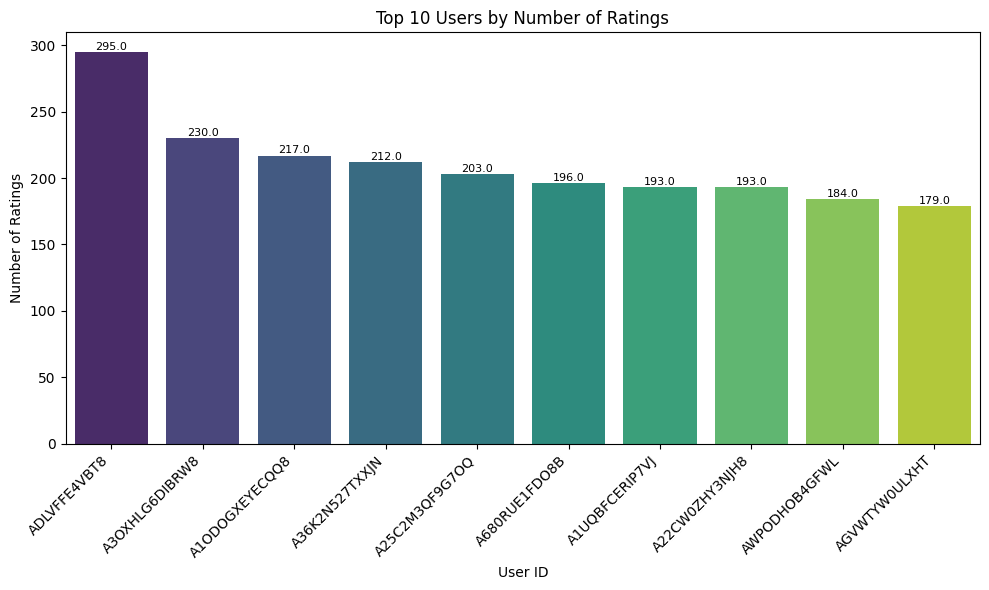

In [ ]:
#Visualizing the users with the highest rating
top_n = 10

plt.figure(figsize=(10, 6))
bars = sns.barplot(x=top_10_users.index[:top_n], y=top_10_users.values[:top_n], palette='viridis')
plt.title('Top {} Users by Number of Ratings'.format(top_n))
plt.xlabel('User ID')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45, ha='right')

# Annotate each bar with its value
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., yval + 0.05, round(yval, 2),
             ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

**Write your observations here:**
- **ADLVFFE4VBT8**  has the highest user rating.

**Now that we have explored and prepared the data, let's build the first recommendation system.**

## **Model 1: Rank Based Recommendation System**

In [ ]:
# Calculate the average rating for each product
average_ratings = df_filtered.groupby('prod_id')['rating'].mean()

# Calculate the count of ratings for each product
rating_counts = df_filtered.groupby('prod_id')['rating'].count()

# Create a dataframe with calculated average and count of ratings
final_rating = pd.DataFrame({'avg_rating': average_ratings, 'rating_counts': rating_counts})

# Sort the dataframe by average of ratings in the descending order
final_rating.sort_values('avg_rating', ascending = False)

# See the first five records of the "final_rating" dataset
final_rating.head()


,avg_rating,rating_counts
prod_id,,
1400501466,3.333333,6
1400532655,3.833333,6
1400599997,4.000000,5
9983891212,4.875000,8
B00000DM9W,5.000000,5


In [ ]:
# Defining a function to get the top n products based on the highest average rating and minimum interactions
def top_n_products(final_rating, n, min_interaction):

 # Finding products with minimum number of interactions
 recommendations = final_rating[final_rating['rating_counts'] > min_interaction]

 # Sorting values with respect to average rating
 recommendations = recommendations.sort_values('avg_rating', ascending = False)

 # Return the top n products
 return recommendations.head(n)


### **Recommending top 5 products with 50 minimum interactions based on popularity**

In [ ]:
# Use the function to recommend top 5 products with 50 minimum interactions
top_products = top_n_products(final_rating, 5, 50)

# Print the top 5 products
print("Top 5 products with at least 50 interactions based on popularity:")
top_products

Top 5 products with at least 50 interactions based on popularity:


,avg_rating,rating_counts
prod_id,,
B001TH7GUU,4.871795,78
B003ES5ZUU,4.864130,184
B0019EHU8G,4.855556,90
B006W8U2MU,4.824561,57
B000QUUFRW,4.809524,84


### **Recommending top 5 products with 100 minimum interactions based on popularity**

In [ ]:
# Use the function to recommend top 5 products with 100 minimum interactions
top_products = top_n_products(final_rating, 5, 100)

# Print the top 5 products
print("Top 5 products with at least 100 interactions based on popularity:")
top_products


Top 5 products with at least 100 interactions based on popularity:


,avg_rating,rating_counts
prod_id,,
B003ES5ZUU,4.864130,184
B000N99BBC,4.772455,167
B007WTAJTO,4.701220,164
B002V88HFE,4.698113,106
B004CLYEDC,4.669492,118


We have recommended the **top 5** products by using the popularity recommendation system. Now, let's build a recommendation system using **collaborative filtering.**

## **Model 2: Collaborative Filtering Recommendation System**

### **Building a baseline user-user similarity based recommendation system**

- Below, we are building **similarity-based recommendation systems** using `cosine` similarity and using **KNN to find similar users** which are the nearest neighbor to the given user.  
- We will be using a new library, called `surprise`, to build the remaining models. Let's first import the necessary classes and functions from this library.

In [ ]:
# To compute the accuracy of models
from surprise import accuracy

# Class is used to parse a file containing ratings, data should be in structure - user ; item ; rating
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the rating data in train and test datasets
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# for implementing K-Fold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

**Before building the recommendation systems, let's  go over some basic terminologies we are going to use:**

**Relevant item:** An item (product in this case) that is actually **rated higher than the threshold rating** is relevant, if the **actual rating is below the threshold then it is a non-relevant item**.  

**Recommended item:** An item that's **predicted rating is higher than the threshold is a recommended item**, if the **predicted rating is below the threshold then that product will not be recommended to the user**.  


**False Negative (FN):** It is the **frequency of relevant items that are not recommended to the user**. If the relevant items are not recommended to the user, then the user might not buy the product/item. This would result in the **loss of opportunity for the service provider**, which they would like to minimize.

**False Positive (FP):** It is the **frequency of recommended items that are actually not relevant**. In this case, the recommendation system is not doing a good job of finding and recommending the relevant items to the user. This would result in **loss of resources for the service provider**, which they would also like to minimize.

**Recall:** It is the **fraction of actually relevant items that are recommended to the user**, i.e., if out of 10 relevant products, 6 are recommended to the user then recall is 0.60. Higher the value of recall better is the model. It is one of the metrics to do the performance assessment of classification models.

**Precision:** It is the **fraction of recommended items that are relevant actually**, i.e., if out of 10 recommended items, 6 are found relevant by the user then precision is 0.60. The higher the value of precision better is the model. It is one of the metrics to do the performance assessment of classification models.

**While making a recommendation system, it becomes customary to look at the performance of the model. In terms of how many recommendations are relevant and vice-versa, below are some most used performance metrics used in the assessment of recommendation systems.**

### **Precision@k, Recall@ k, and F1-score@k**

**Precision@k** - It is the **fraction of recommended items that are relevant in `top k` predictions**. The value of k is the number of recommendations to be provided to the user. One can choose a variable number of recommendations to be given to a unique user.  


**Recall@k** - It is the **fraction of relevant items that are recommended to the user in `top k` predictions**.

**F1-score@k** - It is the **harmonic mean of Precision@k and Recall@k**. When **precision@k and recall@k both seem to be important** then it is useful to use this metric because it is representative of both of them.

### **Some useful functions**

- Below function takes the **recommendation model** as input and gives the **precision@k, recall@k, and F1-score@k** for that model.  
- To compute **precision and recall**, **top k** predictions are taken under consideration for each user.
- We will use the precision and recall to compute the F1-score.

In [ ]:
def precision_recall_at_k(model, k = 10, threshold = 3.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user
    user_est_true = defaultdict(list)

    # Making predictions on the test data
    predictions = model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x: x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. Therefore, we are setting Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. Therefore, we are setting Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    # Mean of all the predicted precisions are calculated.
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated.
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)

    accuracy.rmse(predictions)

    print('Precision: ', precision) # Command to print the overall precision

    print('Recall: ', recall) # Command to print the overall recall

    print('F_1 score: ', round((2*precision*recall)/(precision+recall), 3)) # Formula to compute the F-1 score

**Hints:**

- To compute **precision and recall**, a **threshold of 3.5 and k value of 10 can be considered for the recommended and relevant ratings**.
- Think about the performance metric to choose.

Below we are loading the **`rating` dataset**, which is a **pandas DataFrame**, into a **different format called `surprise.dataset.DatasetAutoFolds`**, which is required by this library. To do this, we will be **using the classes `Reader` and `Dataset`.**

In [ ]:
# Instantiating Reader scale with expected rating scale
reader = Reader(rating_scale = (0, 5))

# Loading the rating dataset
df_surp = Dataset.load_from_df(df_filtered[['user_id', 'prod_id', 'rating']], reader)

# Splitting the data into train and test datasets
trainset, testset = train_test_split(df_surp, test_size = 0.2, random_state = 42)

Now, we are **ready to build the first baseline similarity-based recommendation system** using the cosine similarity.

### **Building the user-user Similarity-based Recommendation System**

In [ ]:
# Declaring the similarity options
sim_options = {'name': 'cosine',
               'user_based': True}

# Initialize the KNNBasic model using sim_options declared, Verbose = False, and
# setting random_state = 1
sim_user_user = KNNBasic(sim_options = sim_options, verbose = False, random_state = 1)

# Fit the model on the training data
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score using the precision_recall_at_k function defined above
precision_recall_at_k(sim_user_user)

RMSE: 1.0012
Precision:  0.855
Recall:  0.858
F_1 score:  0.856


**Observations**

- **RMSE (1.0012)**: This indicates the average error in the predicted ratings. On average, the predicted ratings deviate by about 1 star from the actual ratings given by users.

- **Precision (0.855):** 85.5% of those recommendations are likely to be products the user will actually find relevant.

- **Recall (0.858)**: The system is able to recommend about 85.8% of all the products a user might potentially like.

- **F_1 score (0.856)**: An F_1 score of 0.856 suggests a good balance between precision and recall.

Let's now **predict rating for a user with `userId=A3LDPF5FMB782Z` and `productId=1400501466`** as shown below. Here the user has already interacted or watched the product with productId '1400501466' and given a rating of 5.

In [ ]:
# Predicting rating for a sample user with an interacted product
sim_user_user.predict("A3LDPF5FMB782Z", "1400501466", r_ui = 5, verbose = True)

user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 3.40   {'actual_k': 5, 'was_impossible': False}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=5, est=3.4, details={'actual_k': 5, 'was_impossible': False})

**Observations**
- The above output shows that **the actual rating for this user-item pair is 5 and the predicted rating is 3.40** by the **user-user-similarity-based baseline model**. This implies that the model is under-estimating the ratings.

Below is the **list of users who have not seen the product with product id "1400501466"**.

In [ ]:
# Find unique user_id where prod_id is not equal to "1400501466"

users_not_rated_product = df_filtered[df_filtered.prod_id != "1400501466"].user_id.unique()
users_not_rated_product

array(['A2ZR3YTMEEIIZ4', 'A3CLWR1UUZT6TG', 'A5JLAU2ARJ0BO', ...,
       'A215WH6RUDUCMP', 'A38C12950IM24P', 'A2J4XMWKR8PPD0'], dtype=object)

- It can be observed from the above list that **user "A34BZM6S9L7QI4" has not seen the product with productId "1400501466"** as this userId is a part of the above list.

**Below we are predicting rating for `userId=A34BZM6S9L7QI4` and `prod_id=1400501466`.**

In [ ]:
# Predicting rating for a sample user with a non interacted product
sim_user_user.predict("A34BZM6S9L7QI4", "1400501466", verbose = True)

user: A34BZM6S9L7QI4 item: 1400501466 r_ui = None   est = 4.29   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid='A34BZM6S9L7QI4', iid='1400501466', r_ui=None, est=4.292024046561495, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

**Observations:**

- The user-user Similarity-based Recommendation System could not make a reliable rating prediction for user **'A34BZM6S9L7QI4' for product '1400501466'** due to insufficient similar users who rated the item
- As we can see the estimated rating for this user-item pair is 4.29 based on this similarity based baseline model.

### **Improving similarity-based recommendation system by tuning its hyperparameters**

Below, we will be tuning hyperparameters for the `KNNBasic` algorithm. Let's try to understand some of the hyperparameters of the KNNBasic algorithm:

- **k** (int) – The (max) number of neighbors to take into account for aggregation. Default is 40.
- **min_k** (int) – The minimum number of neighbors to take into account for aggregation. If there are not enough neighbors, the prediction is set to the global mean of all ratings. Default is 1.
- **sim_options** (dict) – A dictionary of options for the similarity measure. And there are four similarity measures available in surprise -
    - cosine
    - msd (default)
    - Pearson
    - Pearson baseline

In [ ]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30],
              'min_k': [3, 6, 9],
              'sim_options': {'name': ['msd', 'cosine'],
                              'user_based': [True]}
}

# Performing 3-fold cross validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the model on the data
gs.fit(df_surp)

# Print the best RMSE score
print(gs.best_score['rmse'])

# Print the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.9714539804764785
{'k': 30, 'min_k': 6, 'sim_options': {'name': 'cosine', 'user_based': True}}


Once the grid search is **complete**, we can get the **optimal values for each of those hyperparameters**.

Now, let's build the **final model by using tuned values of the hyperparameters**, which we received by using **grid search cross-validation**.

In [ ]:
# Using the optimal similarity measure for user-user-based collaborative filtering
sim_options = {'name': 'cosine',
               'user_based': True}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(sim_options = sim_options, k = 30, min_k = 3, random_state = 1, verbose = False)

# Training the algorithm on the trainset
sim_user_user_optimized.fit(trainset)

# Let us compute precision@k and recall@k
precision_recall_at_k(sim_user_user_optimized)

RMSE: 0.9554
Precision:  0.855
Recall:  0.885
F_1 score:  0.87


**Observations:**
- With optimal value from GridSearch, we notice that the RMSE value has reduced to 0.9554.
- Better F1_score of 87% is also observed.


### **Steps:**
- **Predict rating for the user with `userId="A3LDPF5FMB782Z"`, and `prod_id= "1400501466"` using the optimized model**
- **Predict rating for `userId="A34BZM6S9L7QI4"` who has not interacted with `prod_id ="1400501466"`, by using the optimized model**
- **Compare the output with the output from the baseline model**

In [ ]:
# Use sim_user_user_optimized model to recommend for userId "A3LDPF5FMB782Z" and productId 1400501466
sim_user_user_optimized.predict("A3LDPF5FMB782Z", "1400501466", r_ui = 5, verbose = True)


user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 3.40   {'actual_k': 5, 'was_impossible': False}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=5, est=3.4, details={'actual_k': 5, 'was_impossible': False})

In [ ]:
# Use sim_user_user_optimized model to recommend for userId "A34BZM6S9L7QI4" and productId "1400501466"
sim_user_user.predict("A2ZR3YTMEEIIZ4", "1400501466", verbose = True)

user: A2ZR3YTMEEIIZ4 item: 1400501466 r_ui = None   est = 4.29   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid='A2ZR3YTMEEIIZ4', iid='1400501466', r_ui=None, est=4.292024046561495, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

**Observations:**

- The above output shows that **the actual rating for this user-user pair is 5 and the predicted rating is 3.40** by the **similarity-user-based recommendation system**. This implies that the model is under-estimating the ratings.
- Predicted rating for user not previously interacted with the productId is 4.29.


### **Identifying similar users to a given user (nearest neighbors)**

We can also find out **similar users to a given user** or its **nearest neighbors** based on this KNNBasic algorithm. Below, we are finding the 5 most similar users to the first user in the list with internal id 0, based on the `msd` distance metric.

In [ ]:
# 0 is the inner id of the above user
sim_user_user_optimized.get_neighbors(0, 5)

[6, 7, 17, 26, 32]

### **Implementing the recommendation algorithm based on optimized KNNBasic model**

Below we will be implementing a function where the input parameters are:

- data: A **rating** dataset
- user_id: A user id **against which we want the recommendations**
- top_n: The **number of products we want to recommend**
- algo: the algorithm we want to use **for predicting the ratings**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [ ]:
def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended product ids
    recommendations = []

    # Creating an user item interactions matrix
    user_item_interactions_matrix = data.pivot(index = 'user_id', columns = 'prod_id', values = 'rating')

    # Extracting those product ids which the user_id has not interacted yet
    non_interacted_products = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through each of the product ids which user_id has not interacted yet
    for item_id in non_interacted_products:

        # Predicting the ratings for those non interacted product ids by this user
        est = algo.predict(user_id, item_id).est

        # Appending the predicted ratings
        recommendations.append((item_id, est))

    # Sorting the predicted ratings in descending order
    recommendations.sort(key = lambda x: x[1], reverse = True)

    return recommendations[:top_n] # Returing top n highest predicted rating products for this user

**Predicting top 5 products for userId = "A3LDPF5FMB782Z" with similarity based recommendation system**

In [ ]:
# Making top 5 recommendations for user_id "A3LDPF5FMB782Z" with a similarity-based recommendation engine
recommendations = get_recommendations(df_filtered, "A3LDPF5FMB782Z", 5, sim_user_user)

In [ ]:
# Building the dataframe for above recommendations with columns "prod_id" and "predicted_ratings"
recommendations_df = pd.DataFrame(recommendations, columns = ['prod_id', 'predicted_ratings'])
recommendations_df

,prod_id,predicted_ratings
0,1400599997,5
1,B00000DM9W,5
2,B00000K4KH,5
3,B00001W0DI,5
4,B00002EQCW,5


### **Item-Item Similarity-based Collaborative Filtering Recommendation System**

* Above we have seen **similarity-based collaborative filtering** where similarity is calculated **between users**. Now let us look into similarity-based collaborative filtering where similarity is seen **between items**.

In [ ]:
# Using the optimal similarity measure for user-user-based collaborative filtering
sim_options = {'name': 'cosine',
               'user_based': True}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(sim_options = sim_options, k = 40, min_k = 6, random_state = 1, verbose = False)

# Training the algorithm on the trainset
sim_user_user_optimized.fit(trainset)

# Let us compute precision@k and recall@k also with k = 10
precision_recall_at_k(sim_user_user_optimized)


RMSE: 0.9526
Precision:  0.847
Recall:  0.894
F_1 score:  0.87


**Observations:**

- **RMSE (0.9526)**: The values has reduced to 95.26% and is better than other models.

- **Precision (0.847):** 84.7% of those recommendations are likely to be products the user will actually find relevant.

- **Recall (0.894)**: The system is able to recommend about 89.4% of all the products a user might potentially like. An improvement compared to previous recommnendation systems models.

- **F_1 score (0.87)**: An F_1 score of 0.87 suggests a good balance between precision and recall.

Let's now **predict a rating for a user with `userId = A3LDPF5FMB782Z` and `prod_Id = 1400501466`** as shown below. Here the user has already interacted or watched the product with productId "1400501466".

In [ ]:
# Predicting rating for a sample user with an interacted product
sim_user_user_optimized.predict("A3LDPF5FMB782Z", "1400501466", r_ui = 5, verbose = True)


user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 4.29   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=5, est=4.292024046561495, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

Below we are **predicting rating for the `userId = A34BZM6S9L7QI4` and `prod_id = 1400501466`**.

In [ ]:
# Predicting rating for a sample user with a non interacted product
sim_user_user_optimized.predict("A34BZM6S9L7QI4", "1400501466", verbose = True)


user: A34BZM6S9L7QI4 item: 1400501466 r_ui = None   est = 4.29   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid='A34BZM6S9L7QI4', iid='1400501466', r_ui=None, est=4.292024046561495, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

**Observations:**

- The above output shows that **the actual rating for this item-item pair is 5 and the predicted rating is 4.29** by the **item-item based recommendation system**. This implies that the model is slightly under-estimating the ratings.
- Predicted rating for user not previously interacted with the productId is 4.29.

### **Hyperparameter tuning the item-item similarity-based model**
- Use the following values for the param_grid and tune the model.
  - 'k': [10, 20, 30]
  - 'min_k': [3, 6, 9]
  - 'sim_options': {'name': ['msd', 'cosine']
  - 'user_based': [False]
- Use GridSearchCV() to tune the model using the 'rmse' measure
- Print the best score and best parameters

In [ ]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ['msd', 'cosine'],
                              'user_based': [False]}
              }

# Performing 3-fold cross validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the model on the data
gs.fit(df_surp)

# Print the best RMSE score
print(gs.best_score['rmse'])

# Print the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


0.9759460139196262
{'k': 30, 'min_k': 6, 'sim_options': {'name': 'msd', 'user_based': False}}


Once the **grid search** is complete, we can get the **optimal values for each of those hyperparameters as shown above.**

Now let's build the **final model** by using **tuned values of the hyperparameters** which we received by using grid search cross-validation.

### **Use the best parameters from GridSearchCV to build the optimized item-item similarity-based model. Compare the performance of the optimized model with the baseline model.**

In [ ]:
# Using the optimal similarity measure for item-item based collaborative filtering
sim_options = {'name': 'cosine',
               'user_based': False}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(sim_options = sim_options, k = 30, min_k = 6, random_state = 1, verbose = False)

# Training the algorithm on the trainset
sim_item_item_optimized.fit(trainset)

# Let us compute precision@k and recall@k, f1_score and RMSE
precision_recall_at_k(sim_item_item_optimized)

RMSE: 0.9615
Precision:  0.835
Recall:  0.878
F_1 score:  0.856


**Observations**
- The optimized user-user collaborative filtering model shows an improvement in RMSE (0.9615) compared to the baseline user-user model (1.0012), indicating a slightly more accurate prediction of ratings.
- **Precision** has decreased slightly (0.835 vs. 0.855), meaning that out of the top 10 recommended items, a slightly smaller proportion is likely to be relevant.
- **Recall** has decreased significantly (0.878 vs. 0.858), indicating that the optimized model is recommending  relevant items in its top 10 recommendations.
- The **F1-score** remains same(0.856 vs. 0.856).

### **Steps:**
- **Predict rating for the user with `userId="A3LDPF5FMB782Z"`, and `prod_id= "1400501466"` using the optimized model**
- **Predict rating for `userId="A34BZM6S9L7QI4"` who has not interacted with `prod_id ="1400501466"`, by using the optimized model**
- **Compare the output with the output from the baseline model**

In [ ]:
# Use sim_item_item_optimized model to recommend for userId "A3LDPF5FMB782Z" and productId "1400501466"
sim_user_user_optimized.predict("A3LDPF5FMB782Z", "1400501466", r_ui = 5, verbose = True)


user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 4.29   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=5, est=4.292024046561495, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

In [ ]:
# Use sim_item_item_optimized model to recommend for userId "A34BZM6S9L7QI4" and productId "1400501466"
sim_user_user_optimized.predict("A34BZM6S9L7QI4", "1400501466", verbose = True)

user: A34BZM6S9L7QI4 item: 1400501466 r_ui = None   est = 4.29   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid='A34BZM6S9L7QI4', iid='1400501466', r_ui=None, est=4.292024046561495, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

**Observations:** has the gridserach improved it?

- The above output shows that **the actual rating for this user-user pair is 5 and the predicted rating is 3.40** by the **similarity-user-based recommendation system**. This implies that the model is under-estimating the ratings.
- Predicted rating for user not previously interacted with the productId is 4.29.

### **Identifying similar items to a given item (nearest neighbors)**

We can also find out **similar items** to a given item or its nearest neighbors based on this **KNNBasic algorithm**. Below we are finding the 5 most similar items to the item with internal id 0 based on the `msd` distance metric.

In [ ]:
sim_item_item_optimized.get_neighbors(0, k = 5)

[3, 11, 29, 40, 48]

**Predicting top 5 products for userId = "A1A5KUIIIHFF4U" with similarity based recommendation system.**

**Hint:** Use the get_recommendations() function.

In [ ]:
# Making top 5 recommendations for user_id A1A5KUIIIHFF4U with similarity-based recommendation engine.
recommendations = get_recommendations(df_filtered, "A1A5KUIIIHFF4U", 5, sim_item_item_optimized)

In [ ]:
# Building the dataframe for above recommendations with columns "prod_id" and "predicted_ratings"
pd.DataFrame(recommendations, columns = ['prod_id', 'predicted_ratings'])

,prod_id,predicted_ratings
0,1400532655,4.292024
1,1400599997,4.292024
2,9983891212,4.292024
3,B00000DM9W,4.292024
4,B00000J1V5,4.292024


Now as we have seen **similarity-based collaborative filtering algorithms**, let us now get into **model-based collaborative filtering algorithms**.

### **Model 3: Model-Based Collaborative Filtering - Matrix Factorization**

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

### Singular Value Decomposition (SVD)

SVD is used to **compute the latent features** from the **user-item matrix**. But SVD does not work when we **miss values** in the **user-item matrix**.

In [ ]:
# Using SVD matrix factorization. Use random_state = 1
svd = SVD(random_state = 1)

# Training the algorithm on the trainset
svd.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd)

RMSE: 0.8882
Precision:  0.853
Recall:  0.88
F_1 score:  0.866


**Observations:**

- **RMSE (0.8882)**: - The SVD model shows an improvement in RMSE compared to the previous, indicating a slightly more accurate prediction of ratings.

- **Precision (0.853):** 85.3% of those recommendations are likely to be products the user will actually find relevant.

- **Recall (0.88)**: The system is able to recommend about 88% of all the products a user might potentially like. An improvement compared to previous recommnendation systems models.

- **F_1 score (0.866)**: An F_1 score of 0.866 suggests a good balance between precision and recall.

- Out of all the previous models, SVD model performs better compared to the previous models.

**Let's now predict the rating for a user with `userId = "A3LDPF5FMB782Z"` and `prod_id = "1400501466`.**

In [ ]:
# Making prediction
svd.predict("A3LDPF5FMB782Z", "1400501466", r_ui = 5, verbose = True)

user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 4.08   {'was_impossible': False}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=5, est=4.081406749810685, details={'was_impossible': False})

**Below we are predicting rating for the `userId = "A34BZM6S9L7QI4"` and `productId = "1400501466"`.**

In [ ]:
# Making prediction
svd.predict("A34BZM6S9L7QI4", "1400501466", verbose = True)


user: A34BZM6S9L7QI4 item: 1400501466 r_ui = None   est = 4.40   {'was_impossible': False}


Prediction(uid='A34BZM6S9L7QI4', iid='1400501466', r_ui=None, est=4.40037568046934, details={'was_impossible': False})

**Observations:**

- The above output shows that **the actual rating for this Singular Value Decomposition  pair is 5 and the predicted rating is 4.08** by the **Singular Value Decomposition -based recommendation system**. This implies that the model is under-estimating the ratings but is closer to the user rating compared to the other recommendation system.
- Predicted rating for user not previously interacted with the productId is 4.40.





### **Improving Matrix Factorization based recommendation system by tuning its hyperparameters**

Below we will be tuning only three hyperparameters:
- **n_epochs**: The number of iterations of the SGD algorithm.
- **lr_all**: The learning rate for all parameters.
- **reg_all**: The regularization term for all parameters.

In [ ]:
# Set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

# Performing 3-fold gridsearch cross validation
gs = GridSearchCV(SVD, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the model on the data
gs.fit(df_surp)

# Print the best RMSE score
print(gs.best_score['rmse'])

# Print the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


0.8988198531901497
{'n_epochs': 20, 'lr_all': 0.01, 'reg_all': 0.2}


Now, we will **the build final model** by using **tuned values** of the hyperparameters, which we received using grid search cross-validation above.

In [ ]:
# Build the optimized SVD model using optimal hyperparameter search. Use random_state=1
svd_optimized = SVD(n_epochs = 20, lr_all = 0.01, reg_all = 0.2, random_state = 1)

# Train the algorithm on the trainset
svd_optimized = svd_optimized.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd_optimized)

RMSE: 0.8808
Precision:  0.854
Recall:  0.878
F_1 score:  0.866


**Observations**
- The optimized user-user collaborative filtering model shows an improvement in RMSE (0.8808) compared to the baseline user-user model (0.8882), indicating a slightly more accurate prediction of ratings.
- **Precision** has decreased slightly (0.854 vs. 0.853), meaning that out of the top 10 recommended items, a slightly smaller proportion is likely to be relevant.
- **Recall** has decreased (0.878 vs. 0.888), indicating that the optimized model is recommending  relevant items in its top 10 recommendations.
- The **F1-score** remains same(0.866 vs. 0.856).

### **Steps:**
- **Predict rating for the user with `userId="A3LDPF5FMB782Z"`, and `prod_id= "1400501466"` using the optimized model**
- **Predict rating for `userId="A34BZM6S9L7QI4"` who has not interacted with `prod_id ="1400501466"`, by using the optimized model**
- **Compare the output with the output from the baseline model**

In [ ]:
# Use svd_algo_optimized model to recommend for userId "A3LDPF5FMB782Z" and productId "1400501466"
svd_optimized.predict("A3LDPF5FMB782Z", "1400501466", r_ui = 5, verbose = True)


user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 4.13   {'was_impossible': False}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=5, est=4.128589011282042, details={'was_impossible': False})

In [ ]:
# Use svd_algo_optimized model to recommend for userId "A34BZM6S9L7QI4" and productId "1400501466"
svd_optimized.predict("A34BZM6S9L7QI4", "1400501466", verbose = True)


user: A34BZM6S9L7QI4 item: 1400501466 r_ui = None   est = 4.22   {'was_impossible': False}


Prediction(uid='A34BZM6S9L7QI4', iid='1400501466', r_ui=None, est=4.216280997100113, details={'was_impossible': False})

**Observations:**

- The above output shows that **the actual rating for this matrix-factorization pair is 5 and the predicted rating is 4.13** by the **matrix-factorization-based recommendation system**. This implies that the model is under-estimating the ratings but is closer to the user rating
- Predicted rating for user not previously interacted with the productId is 4.22 and seems to have dropped when compared to the baseline models.



### **Conclusion and Recommendations**

**Conclusion**
- The analysis shows the tuned SVD model was the most effective for predicting product ratings, achieving the lowest Root Mean Square Error (RMSE) of 0.8802, which demonstrates its strong predictive accuracy.
- A key consideration, however, is that the **associations for a given user keep changing** because the data is randomly split each time, so the user might not always be included in the training set, which affected how the model finds similar users and makes predictions.

**Recommendations:**

- The **tuned SVD  model emerge as the top performer**, with SVD having a slight edge in the final RMSE.
- The tuned SVD model is a strong candidate for the primary recommendation engine due to its lowest RMSE (0.8802) on the test set. It demonstrates good predictive accuracy.
